<a href="https://colab.research.google.com/github/Redsoxnc87/Hello-World/blob/master/Overbought_Longterm_Buys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import math 
import numpy as np

In [2]:
from pandas import Series, DataFrame
from numpy import random, array
from math import sqrt, exp, pi, pow

In [3]:
import operator
import requests
import pandas.plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
scrn = pd.read_csv('Market_Min_Screening.csv')

In [6]:
scrn.describe()

,Last,1Y %Chg,5Y Rev%,Debt/Equity,Profit%,P/E (ttm),Net Income(a),Sales(a),Shares Out,Market Cap,14D Rel Str,52W Chg,3M Chg,1M Chg,Change
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,313.000000,313.000000,313.000000,313.000000,313.000000
mean,92.449329,0.132348,1.137195,0.657444,12.619665,23.807668,5.737488e+08,5.535576e+09,2.327548e+08,1.369688e+10,0.467460,10.759425,8.685783,-2.114952,0.987412
std,236.882830,0.082979,7.205293,0.607339,11.040519,10.223294,9.709883e+08,8.550758e+09,5.047880e+08,1.798954e+10,0.091841,26.157720,44.509316,12.093039,6.560625
min,2.510000,0.011000,-0.819000,0.000000,1.006000,1.630000,1.740000e+06,4.069000e+07,3.702000e+06,3.134200e+08,0.215000,0.110000,-20.050000,-179.240000,-7.390000
25%,32.860000,0.060000,0.068000,0.170000,5.527000,16.480000,8.093000e+07,9.630100e+08,4.143800e+07,1.850449e+09,0.408000,1.970000,0.240000,-4.210000,-0.020000
50%,56.990000,0.121000,0.322000,0.550000,9.476000,22.310000,2.534300e+08,2.957010e+09,9.105000e+07,5.126753e+09,0.457000,5.340000,3.970000,-1.110000,0.470000
75%,102.450000,0.203000,0.754000,0.920000,15.090000,29.470000,6.901000e+08,6.782520e+09,2.359770e+08,1.829858e+10,0.529000,11.470000,10.500000,1.060000,1.130000
max,4044.520000,0.299000,118.881000,2.840000,61.015000,49.670000,9.042000e+09,7.463900e+10,5.692082e+09,8.923523e+10,0.762000,409.270000,766.410000,37.650000,113.230000


In [7]:
L = list(range(0,313))

In [8]:
Prof_Prct = scrn.loc[(scrn['Profit%'])>=10]

In [9]:
len(Prof_Prct)

146

In [10]:
OvBought = Prof_Prct.loc[(Prof_Prct['14D Rel Str'])<=0.50]

In [11]:
len(OvBought)

93

In [12]:
OvBought.describe()

,Last,1Y %Chg,5Y Rev%,Debt/Equity,Profit%,P/E (ttm),Net Income(a),Sales(a),Shares Out,Market Cap,14D Rel Str,52W Chg,3M Chg,1M Chg,Change
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000
mean,96.976452,0.124978,0.826097,0.622796,20.974731,26.186237,7.955271e+08,4.427140e+09,2.580297e+08,1.897021e+10,0.421452,10.819677,2.889140,-4.601398,0.636559
std,87.579428,0.080118,3.152210,0.571615,12.257726,11.187873,1.218707e+09,6.168611e+09,3.220529e+08,1.973261e+10,0.046377,12.673821,8.650194,7.008328,1.814141
min,2.510000,0.013000,-0.819000,0.000000,10.094000,3.520000,8.380000e+06,5.158000e+07,5.628000e+06,3.578640e+08,0.272000,0.160000,-20.050000,-39.260000,-7.390000
25%,45.100000,0.047000,0.000000,0.120000,12.375000,18.720000,1.532500e+08,8.948000e+08,5.888300e+07,3.123789e+09,0.398000,2.250000,-2.490000,-5.080000,-0.040000
50%,66.870000,0.119000,0.331000,0.530000,15.853000,25.030000,4.774000e+08,2.957010e+09,1.491420e+08,1.244947e+10,0.426000,6.690000,1.530000,-3.000000,0.570000
75%,123.320000,0.188000,0.817000,0.920000,24.591000,33.800000,8.910000e+08,4.609800e+09,2.853850e+08,2.615480e+10,0.456000,14.840000,7.190000,-1.080000,1.100000
max,482.300000,0.295000,29.963000,2.480000,61.015000,49.140000,9.042000e+09,4.141900e+10,1.632993e+09,8.055802e+10,0.499000,56.510000,29.680000,6.330000,9.580000


In [13]:
OvBought.head()

,Symbol,Name,Last,Exchange,Industry,1Y %Chg,5Y Rev%,Debt/Equity,Profit%,P/E (ttm),Net Income(a),Sales(a),Shares Out,Market Cap,Long Term Signal,Short Term Signal,14D Rel Str,52W Chg,3M Chg,1M Chg,Change,SIC Description,Time
1,AAON,Aaon Inc,56.99,NASDAQ,Building Prdcts - Air Heating,0.165,0.317,0.00,11.444,42.74,5.371000e+07,4.693300e+08,52262000.0,2.929285e+09,Buy,Hold,0.483,8.09,2.94,-1.59,0.94,SIC-3585 Air-Cond & Warm Air Heatg Equip & Com...,9/22/2020
12,ALRM,Alarm.com,55.58,NASDAQ,Protection - Safety,0.137,2.003,0.31,10.616,42.25,5.333000e+07,5.023600e+08,48966000.0,2.668646e+09,Buy,Sell,0.419,6.69,-7.46,-3.18,1.08,SIC-7372 Services-Prepackaged Software,9/22/2020
14,AMAT,Applied Materials,57.89,NASDAQ,Semi-Eqpt Wafer Fabrication,0.136,0.610,0.69,18.524,15.05,2.706000e+09,1.460800e+10,913283000.0,5.234938e+10,Hold,Sell,0.443,6.93,-3.38,-4.38,0.57,SIC-3674 Semiconductors & Related Devices,9/22/2020
15,AME,Amtek Inc,97.24,NYSE,Electronic Test Equipment,0.082,0.283,0.51,16.697,25.18,8.613000e+08,5.158560e+09,229630000.0,2.209959e+10,Buy,Buy,0.435,7.36,7.91,-3.00,1.00,NaN,9/22/2020
16,AMH,American Homes 4 Rent,28.13,NYSE,REIT - Equity Trust Resident,0.111,1.867,0.49,12.335,25.23,1.410400e+08,1.143380e+09,301235000.0,8.377345e+09,Buy,Buy,0.448,2.80,0.96,-0.56,0.32,SIC-6798 Real Estate Investment Trusts,9/22/2020


In [14]:
OvBought.Industry.value_counts()

REIT - Equity Trust Other      11
Business Information            4
Insurance - Brokers             4
Food - Misc & Diversified       3
Electronics Products - Misc     3
                               ..
Transportation - Ship           1
Soap and Cleaning Products      1
Food - Meat Products            1
Wireless Non-US                 1
Semi Power                      1
Name: Industry, Length: 61, dtype: int64

In [15]:
OvBought.Exchange.value_counts()

NYSE      54
NASDAQ    39
Name: Exchange, dtype: int64

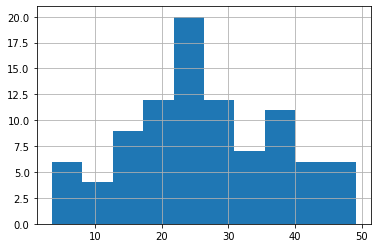

In [16]:
OvBought['P/E (ttm)'].hist()

In [17]:
NASDAQ = OvBought.loc[(OvBought['Exchange'])=='NASDAQ']

In [18]:
NYSE = OvBought.loc[(OvBought['Exchange'])=='NYSE']

In [19]:
len(NASDAQ)

39

In [20]:
len(NYSE)

54

In [21]:
Lng_Term = OvBought.loc[(OvBought['Long Term Signal'])=='Buy']

In [22]:
len(Lng_Term)

75

In [23]:
Lng_Term.to_csv('Longterm_Overboughts.csv', index=False)

In [24]:
Shrt_Term = Lng_Term.loc[(Lng_Term['Short Term Signal'])=='Buy']

In [25]:
len(Shrt_Term)

46

In [26]:
Shrt_Term.to_csv('Shorterm_Overboughts.csv', index=False)

In [27]:
li = list(range(0,46))

In [28]:
Shrt_Term.describe()

,Last,1Y %Chg,5Y Rev%,Debt/Equity,Profit%,P/E (ttm),Net Income(a),Sales(a),Shares Out,Market Cap,14D Rel Str,52W Chg,3M Chg,1M Chg,Change
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,46.000000,46.000000,46.000000,46.000000,46.00000
mean,92.232391,0.116196,0.468565,0.686304,18.425348,25.067609,9.184233e+08,5.649368e+09,2.978693e+08,2.076250e+10,0.433391,8.943261,6.019565,-2.465435,0.23413
std,90.006879,0.080831,0.982231,0.622923,10.379958,10.234428,1.431347e+09,7.641366e+09,3.683037e+08,2.174240e+10,0.040958,11.304015,7.866071,5.234455,2.18954
min,8.320000,0.014000,-0.819000,0.000000,10.094000,6.030000,8.380000e+06,6.085000e+07,5.628000e+06,4.136020e+08,0.340000,0.220000,-17.200000,-28.540000,-7.39000
25%,44.657500,0.038250,0.000000,0.232500,12.188000,18.230000,1.928225e+08,1.147378e+09,8.602500e+07,4.100383e+09,0.408750,1.935000,1.215000,-4.057500,-0.14250
50%,64.670000,0.097500,0.148500,0.525000,13.976500,23.110000,5.530200e+08,3.602340e+09,2.253630e+08,1.238067e+10,0.437000,5.780000,4.435000,-1.760000,0.32000
75%,99.282500,0.185750,0.681750,1.015000,22.223250,31.290000,1.046175e+09,5.329100e+09,3.005205e+08,2.968368e+10,0.462250,10.597500,9.992500,-0.040000,0.94250
max,482.300000,0.278000,5.197000,2.480000,61.015000,47.630000,9.042000e+09,4.141900e+10,1.632993e+09,8.055802e+10,0.499000,55.980000,27.630000,6.330000,9.58000


In [29]:
Downs = Shrt_Term.loc[(Shrt_Term['1M Chg'])<-2.50]

In [30]:
len(Downs)

19

In [32]:
Downs.Industry.value_counts()

Finance - Investment Brokers      2
Food - Misc & Diversified         1
Utility - Electric Power          1
Business Services                 1
Electronics - Connectors          1
Building - CMT & CNT & AG         1
Insurance - Brokers               1
Internet - Services               1
Soap and Cleaning Products        1
Insurance - Proprty & Casualty    1
Outsourcing                       1
Computer - Software               1
Semi Analog & Mixed               1
Securities Exchanges              1
Electronic Test Equipment         1
Banks - West                      1
Medical - Outpatient & Hm Care    1
Mining - Gold                     1
Name: Industry, dtype: int64

In [34]:
Downs.head(19)

,Symbol,Name,Last,Exchange,Industry,1Y %Chg,5Y Rev%,Debt/Equity,Profit%,P/E (ttm),Net Income(a),Sales(a),Shares Out,Market Cap,Long Term Signal,Short Term Signal,14D Rel Str,52W Chg,3M Chg,1M Chg,Change,SIC Description,Time
15,AME,Amtek Inc,97.24,NYSE,Electronic Test Equipment,0.082,0.283,0.51,16.697,25.18,8.613000e+08,5.158560e+09,2.296300e+08,2.209959e+10,Buy,Buy,0.435,7.36,7.91,-3.00,1.00,NaN,9/22/2020
22,APH,Amphenol Corp,104.62,NYSE,Electronics - Connectors,0.115,0.539,1.03,14.042,31.56,1.155000e+09,8.225400e+09,2.983770e+08,3.087904e+10,Buy,Buy,0.436,10.80,7.06,-3.62,1.13,SIC-3678 Electronic Connectors,9/22/2020
42,BR,Broadridge Financial Solutions Llc,132.04,NYSE,Outsourcing,0.042,0.681,1.40,10.212,26.15,4.625000e+08,4.529000e+09,1.151620e+08,1.507586e+10,Buy,Buy,0.426,5.33,7.33,-4.83,1.13,"SIC-7389 Services-Business Services, NEC",9/22/2020
51,CHD,Church & Dwight Company,91.59,NYSE,Soap and Cleaning Products,0.258,0.322,0.64,14.134,32.14,6.159000e+08,4.357700e+09,2.473120e+08,2.216905e+10,Buy,Buy,0.460,18.79,14.04,-4.91,1.95,"SIC-2840 Soap, Detergents, Cleaning Preparatio...",9/22/2020
52,CHE,Chemed Inc,482.30,NYSE,Medical - Outpatient & Hm Care,0.131,0.331,0.23,11.345,30.48,2.199200e+08,1.938560e+09,1.591900e+07,7.633474e+09,Buy,Buy,0.405,55.98,27.63,-28.54,2.78,SIC-8082 Services-Home Health Care Services,9/22/2020
93,ERIE,Erie Indemnity Company,208.50,NASDAQ,Insurance - Brokers,0.096,-0.596,0.09,12.789,39.08,3.168200e+08,2.477300e+09,4.619200e+07,9.855526e+09,Buy,Buy,0.415,18.29,24.83,-4.13,-4.86,"SIC-6411 Insurance Agents, Brokers & Service",9/22/2020
96,ETFC,E*Trade Finl Corp,49.30,NASDAQ,Finance - Investment Brokers,0.098,0.558,0.24,30.366,14.35,9.550000e+08,3.145000e+09,2.210960e+08,1.105922e+10,Buy,Buy,0.341,4.39,0.48,-3.68,-0.72,NaN,9/22/2020
130,HCI,Homeowners Choice,51.21,NYSE,Insurance - Proprty & Casualty,0.216,-0.089,0.92,10.962,18.65,2.658000e+07,2.424700e+08,7.985000e+06,4.136020e+08,Buy,Buy,0.402,9.11,7.00,-3.84,-0.59,"SIC-6331 Fire, Marine & Casualty Insurance",9/22/2020
140,ICE,Intercontinental Exchange,98.80,NYSE,Securities Exchanges,0.070,0.682,0.31,37.159,22.75,1.933000e+09,5.202000e+09,5.428870e+08,5.389240e+10,Buy,Buy,0.432,6.47,4.49,-5.40,-0.47,NaN,9/22/2020
148,INTU,Intuit Inc,317.28,NASDAQ,Computer - Software,0.179,0.832,0.01,23.779,45.13,1.826000e+09,7.679000e+09,2.618070e+08,8.055802e+10,Buy,Buy,0.489,48.10,23.16,-4.95,9.58,NaN,9/22/2020


In [35]:
Pr = operator.truediv(Shrt_Term['Market Cap'],Shrt_Term['Shares Out'])

In [37]:
Y = operator.sub(Shrt_Term['Last'],Pr)

In [38]:
Y

15     1.000005
16     0.320001
19     0.770000
22     1.129992
35     0.320005
42     1.129986
44     0.490001
50     0.650007
51     1.949999
52     2.780307
63    -0.169999
87     0.689989
93    -4.860019
96    -0.719996
97     1.930005
100   -2.769999
109    1.100005
115    0.409995
118    0.169995
126    0.079998
130   -0.587370
133    0.460002
140   -0.470006
148    9.579992
156    0.050005
161   -0.760001
179   -0.060002
181   -1.029993
182    0.700000
185   -0.039996
187    1.989994
192   -0.729999
218   -0.050000
236    0.569993
254   -7.389991
259    1.100023
263    0.529999
272   -0.040000
274   -0.040001
280    0.749999
287   -0.948493
289    0.249999
300    1.140006
302    1.230003
304    0.229998
310   -2.059994
dtype: float64